# Đồ án Lí Thuyết Lập Trình Khoa Học Dữ Liệu

### Bảng thành viên nhóm 9
|<center><div style="width:150px">MSSV</div><center>|<div style="width:290px">Họ và tên</div>|
|---------- |:-------------:|
| <center>20120041<center>  |  Trần Kim Bảo |
| <center>20120071<center>  | Nguyễn Thị Bích Hà |
| <center>20120369<center>  |    Nguyễn Thanh Tân  | 
| <center>20120521<center>  | Trần Thị Phương Linh |

## Import thư viện

In [1]:
!pip install plotly
!pip install unidecode

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from unidecode import unidecode
import plotly.express as px
import plotly.io as pio
# pio.renderers.default = 'firefox'


## Thu thập dữ liệu

- Nhóm sử dụng dữ liệu "population_en_v2.csv" tại https://data.opendevelopmentcambodia.net/en/dataset/vietnam-population-status-2011-2016.
- Tập dữ liệu mô tả tình trạng dân số của các tỉnh Việt Nam từ năm 2011 đến năm 2020.
- LICENSE của dữ liệu là [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/), người dùng được phép sử dụng với mục đích phi thương mại và phải credit cho chủ sở hữu.
- Người ta thu thập dữ liệu tại website [Tổng cục Thống kê](https://www.gso.gov.vn/).

## Khám phá dữ liệu

### Đọc dữ liệu vào Dataframe `population_df`

In [3]:
population_df = pd.read_csv('population_en_v2.csv')
population_df.head()

Provinces/city  Population density  Average population  Sex ratio  \
0         Ha Noi              2031.1              6761.3       97.8   
1      Vinh Phuc               818.0              1011.4       97.6   
2       Bac Ninh              1292.6              1063.4       96.7   
3     Quang Ninh               191.4              1168.0      105.4   
4      Hai Duong              1044.6              1729.8       96.1   

   Population grow ratio  15+ labor            Region  Year  
0                   1.93     3572.9  Hong river Delta  2011  
1                   0.38      608.3  Hong river Delta  2011  
2                   1.84      593.5  Hong river Delta  2011  
3                   0.93      675.0  Hong river Delta  2011  
4                   0.78     1071.0  Hong river Delta  2011

In [4]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Provinces/city         630 non-null    object 
 1   Population density     630 non-null    float64
 2   Average population     630 non-null    float64
 3   Sex ratio              630 non-null    float64
 4   Population grow ratio  630 non-null    float64
 5   15+ labor              630 non-null    float64
 6   Region                 630 non-null    object 
 7   Year                   630 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 39.5+ KB


### Dữ liệu gồm có bao nhiêu dòng và bao nhiêu cột?

Tính số dòng và số cột rồi lưu vào 2 biến `num_rows` và `num_cols`.

In [5]:
num_rows, num_cols = population_df.shape
num_rows, num_cols

(630, 8)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Mỗi dòng chứa thông tin dân số của các tỉnh Việt Nam qua các năm từ 2011 đến 2020, không có vấn đề các dòng có ý nghĩa khác nhau.

### Tiến hành kiểm tra các dòng có bị lặp không?

Kiểm tra bằng cách lưu kết quả vào biến `have_duplicated_rows`. Biến có giá trị `True` nếu dữ liệu các dòng bị lặp và `False` nếu ngược lại.

In [6]:
duplicated_list = population_df.duplicated()
if True in duplicated_list.values:
    have_duplicated_rows = True
else:
    have_duplicated_rows = False
have_duplicated_rows

False

Ta có thể thấy không có dòng nào bị lặp cả.

### Mỗi cột có ý nghĩa gì?

Mô tả các cột có trong file "population_en_v2.csv"

|STT|Tên cột dữ liệu | <center>Mô tả<center> | Đơn vị |
|--|:------:| ---| --- |
|1|Provinces/city|<center><center>|
|2|Population density| <center><center>|
|3|Average population|<center><center>|
|4|Published Year| <center><center>|  |
|5|Sex ratio|<center><center>|  | 
|6|Population grow ratio|<center><center>|  
|7|15+ labor|<center><center>|  |
|8| Region|<center><center>| |
|9|Year|<center><center>|  |


### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

Ta tiến hành lấy `dtype` của mỗi cột trong `population_df` và lưu kết quả vào series `col_dtypes`.

In [7]:
#YOUR CODE HERE

YOUR TEXT HERE

In [8]:
#YOUR CODE HERE

### Với mỗi cột, các giá trị được phân bố như thế nào?

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào?

Ở dữ liệu này, hiện có 6 cột thuộc nhóm numeric: `Population density`, `Average population`, `Sex ratio`, `Population grow ratio`, `15+ labor`, `Year`. 

In [9]:
numerical_cols = population_df[['Population density', 'Average population', 'Sex ratio',
                                'Population grow ratio','15+ labor', 'Year']].copy()
numerical_cols

Population density  Average population  Sex ratio  Population grow ratio  \
0                2031.1              6761.3      97.80                   1.93   
1                 818.0              1011.4      97.60                   0.38   
2                1292.6              1063.4      96.70                   1.84   
3                 191.4              1168.0     105.40                   0.93   
4                1044.6              1729.8      96.10                   0.78   
..                  ...                 ...        ...                    ...   
625               862.0              1240.7      98.65                   0.39   
626               450.0               729.8     101.38                  -0.33   
627               361.0              1195.7      99.34                  -0.32   
628               342.0               913.5     100.15                   0.58   
629               229.0              1193.9     102.64                  -0.03   

     15+ labor  Year  
0      3572.90  2011  
1       608.30  2011  
2       593.50  2011  
3       675.00  2011  
4      1071.00  2011  
..         ...   ...  
625     716.78  2020  
626     402.33  2020  
627     641.91  2020  
628     507.76  2020  
629     669.77  2020  

[630 rows x 6 columns]

Với mỗi cột numeric ta sẽ tính tỉ lệ % giá trị thiếu (từ 0 đến 100), min, max. Và lưu kết quả vào Dataframe `nume_col_profiles_df`.
Dataframe này gồm có:
- 3 dòng là `missing_ratio`, `min`, `max` lần lượt là tỉ lệ các giá trị thiếu mỗi cột, min và max.
- 5 cột là `Population density`, `Average population`, `Sex ratio`, `Population grow ratio`, `15+ labor`, `Year`.

In [10]:
def missing_ratio(c):
    return  c.isna().sum()/len(population_df) * 100

def min(c):
    return c.min()

def max(c):
    return c.max()

nume_col_profiles_df = numerical_cols.agg([missing_ratio, min, max])
nume_col_profiles_df

Population density  Average population  Sex ratio  \
missing_ratio                 0.0                 0.0        0.0   
min                          42.9               300.4       91.1   
max                        4476.0              9227.6      114.1   

               Population grow ratio  15+ labor    Year  
missing_ratio                   0.00        0.0     0.0  
min                            -1.22      199.6  2011.0  
max                             5.30     4826.0  2020.0

Các cột đều không có giá trị nào bị thiếu và cũng không có gì bất thường ở mỗi cột.

### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào

YOUR TEXT HERE

In [11]:
#YOUR CODE HERE

## Đưa ra các câu hỏi

### Câu 1: Tìm hiểu về sự phân bố lực lượng nhân công trên 15 tuổi (15+ labor) của các tỉnh thành và từng giai đoạn. Có nhận xét gì về xu hướng trong các giai đoạn trên và xu hướng của các tỉnh thành có lực lượng lao động cao vượt trội hơn so với những tỉnh thành còn lại.

**Ý nghĩa khi trả lời câu hỏi:** 
- Ta sẽ có được cái nhìn tổng quan về sự phân bố nhân lực trên 15 tuổi của Việt Nam theo từng vùng miền.
- Ngoài ra, ta sẽ tìm hiểu thêm những thành phố/ tỉnh thành có lực lượng nhân công dưới 15 đông nhất và lí do tại sao những nơi đó lại có sự phân bố như vậy.

**Các bước cần làm để để trả lời câu hỏi:**
- Đầu tiên ta sẽ tiến hành thống kê lực lượng lao động trên 15 tuổi theo từng năm. Sau đó ta lần lượt dùng Bar chart và Choropleth Map để trực quan hóa lực lượng lao động mỗi năm và đưa ra nhận xét tổng quan.
- Tiếp theo, ta chọn ra các tỉnh/ thành phố có lực lượng lao động trên 15 tuổi nhiều nhất ở mỗi miền để tiến hành phân tích chi tiết hơn. Đồng thời dùng Line chart để quan sát và so sánh xu hướng phân bổ lực lượng lao động trên 15 tuổi giữa mỗi tỉnh/ thành đang quan sát.
- Cuối cùng, dựa vào phân tích và trực quan, ta sẽ đưa ra kết luận.

**Bước 1**: Ta sẽ tiến hành lấy từ DataFrame `population_df` các cột `15+ labor`, `Provinces/city`, `Year` để xử lý. 
Đồng thời, ta tiền xử lý cột `15+ labor` bằng cách nhân 1000 cho mỗi giá trị. Vì đơn vị gốc của cột này chính là triệu người. 

In [12]:
labor_df = population_df[['Year','15+ labor', 'Provinces/city']]
labor_df['15+ labor'] = labor_df['15+ labor'].apply(lambda x: x*1000)
labor_df

/tmp/ipykernel_3757/2921320589.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labor_df['15+ labor'] = labor_df['15+ labor'].apply(lambda x: x*1000)


Year  15+ labor Provinces/city
0    2011  3572900.0         Ha Noi
1    2011   608300.0      Vinh Phuc
2    2011   593500.0       Bac Ninh
3    2011   675000.0     Quang Ninh
4    2011  1071000.0      Hai Duong
..    ...        ...            ...
625  2020   716780.0        Can Tho
626  2020   402330.0      Hau Giang
627  2020   641910.0      Soc Trang
628  2020   507760.0       Bac Lieu
629  2020   669770.0         Ca Mau

[630 rows x 3 columns]

**Bước 2**: Ta sẽ tổng hợp lại tổng lực lượng lao động trên 15 tuổi mỗi năm và dùng Bar chart để trực quan hóa. Từ đó có được cái nhìn tổng quan về xu hướng trong các giai đoạn này.

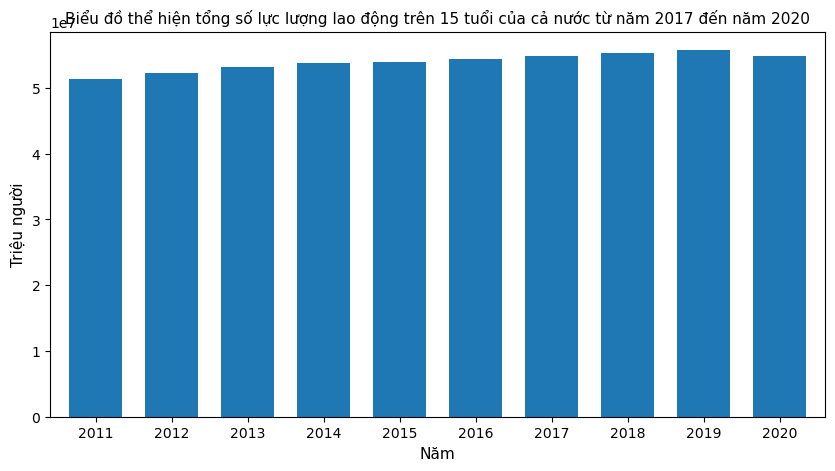

In [13]:
df_sum = labor_df.groupby('Year')['15+ labor'].sum()
ax = df_sum.plot.bar(df_sum, 1, width = 0.7, figsize = (10,5), fontsize = 10)
ax.set_title('Biểu đồ thể hiện tổng số lực lượng lao động trên 15 tuổi của cả nước từ năm 2017 đến năm 2020',
             fontsize = 11)
ax.set_xlabel('Năm', fontsize = 11)
ax.set_ylabel('Triệu người', fontsize = 11)
plt.xticks(rotation = 360)
plt.show()

### **Nhận xét**:
- Nhìn chung, lực lượng lao động tăng đều theo mỗi năm từ năm 2011 đến năm 2019. Cao nhất là năm 2019.
- Tuy nhiên, lại có sự sụt giảm đáng báo động vào năm 2020. Có thể lí giải đây là năm dịch Covid-19 hoành hành, gây nhiều khó khăn cho đời sống kinh tế, cơ hội việc làm nên mới gây ra hiện tượng giảm sút này.

**Bước 3**: Tiếp theo, để đi vào chi tiết hơn của xu hướng, ta sẽ tiến hành tiến hành tách dữ liệu theo từng năm và lưu trữ vào từng Dataframe riêng.

In [14]:
def get_data(year):
    tmp_df = labor_df[['Year','15+ labor', 'Provinces/city']][ labor_df['Year'] == year]
    return tmp_df

Ta sẽ phân tích tổng cộng 10 năm, bắt đầu từ năm 2011 và kết thúc là năm 2020.

In [15]:
df_2011 = get_data(2011)
df_2012 = get_data(2012)
df_2013 = get_data(2013)
df_2014 = get_data(2014)
df_2015 = get_data(2015)
df_2016 = get_data(2016)
df_2017 = get_data(2017)
df_2018 = get_data(2018)
df_2019 = get_data(2019)
df_2020 = get_data(2020)

display(df_2011, df_2012, df_2013, df_2014,  df_2015, df_2016, df_2017, df_2018, df_2019, df_2020)

Year  15+ labor Provinces/city
0   2011  3572900.0         Ha Noi
1   2011   608300.0      Vinh Phuc
2   2011   593500.0       Bac Ninh
3   2011   675000.0     Quang Ninh
4   2011  1071000.0      Hai Duong
..   ...        ...            ...
58  2011   690700.0        Can Tho
59  2011   456000.0      Hau Giang
60  2011   744100.0      Soc Trang
61  2011   514000.0       Bac Lieu
62  2011   684300.0         Ca Mau

[63 rows x 3 columns]

Year  15+ labor Provinces/city
63   2012  3702500.0         Ha Noi
64   2012   607200.0      Vinh Phuc
65   2012   625300.0       Bac Ninh
66   2012   691900.0     Quang Ninh
67   2012  1060600.0      Hai Duong
..    ...        ...            ...
121  2012   698900.0        Can Tho
122  2012   456400.0      Hau Giang
123  2012   749400.0      Soc Trang
124  2012   516000.0       Bac Lieu
125  2012   697700.0         Ca Mau

[63 rows x 3 columns]

Year  15+ labor Provinces/city
126  2013  3799600.0         Ha Noi
127  2013   613200.0      Vinh Phuc
128  2013   642100.0       Bac Ninh
129  2013   711400.0     Quang Ninh
130  2013  1077000.0      Hai Duong
..    ...        ...            ...
184  2013   698600.0        Can Tho
185  2013   462300.0      Hau Giang
186  2013   729300.0      Soc Trang
187  2013   504500.0       Bac Lieu
188  2013   696200.0         Ca Mau

[63 rows x 3 columns]

Year  15+ labor Provinces/city
189  2014  3832400.0         Ha Noi
190  2014   631200.0      Vinh Phuc
191  2014   658200.0       Bac Ninh
192  2014   697200.0     Quang Ninh
193  2014  1049500.0      Hai Duong
..    ...        ...            ...
247  2014   700000.0        Can Tho
248  2014   453300.0      Hau Giang
249  2014   699600.0      Soc Trang
250  2014   505800.0       Bac Lieu
251  2014   700100.0         Ca Mau

[63 rows x 3 columns]

Year  15+ labor Provinces/city
252  2015  3820900.0         Ha Noi
253  2015   631400.0      Vinh Phuc
254  2015   661700.0       Bac Ninh
255  2015   692400.0     Quang Ninh
256  2015  1037500.0      Hai Duong
..    ...        ...            ...
310  2015   693100.0        Can Tho
311  2015   462900.0      Hau Giang
312  2015   704100.0      Soc Trang
313  2015   506500.0       Bac Lieu
314  2015   704100.0         Ca Mau

[63 rows x 3 columns]

Year  15+ labor Provinces/city
315  2016  3822500.0         Ha Noi
316  2016   629800.0      Vinh Phuc
317  2016   666900.0       Bac Ninh
318  2016   691900.0     Quang Ninh
319  2016  1035200.0      Hai Duong
..    ...        ...            ...
373  2016   712900.0        Can Tho
374  2016   471700.0      Hau Giang
375  2016   712100.0      Soc Trang
376  2016   513000.0       Bac Lieu
377  2016   708600.0         Ca Mau

[63 rows x 3 columns]

Year  15+ labor Provinces/city
378  2017  4024200.0         Ha Noi
379  2017   625300.0      Vinh Phuc
380  2017   735600.0       Bac Ninh
381  2017   728100.0     Quang Ninh
382  2017  1071700.0      Hai Duong
..    ...        ...            ...
436  2017   726200.0        Can Tho
437  2017   455800.0      Hau Giang
438  2017   674400.0      Soc Trang
439  2017   514500.0       Bac Lieu
440  2017   683700.0         Ca Mau

[63 rows x 3 columns]

Year  15+ labor Provinces/city
441  2018  4064800.0         Ha Noi
442  2018   630500.0      Vinh Phuc
443  2018   751600.0       Bac Ninh
444  2018   734700.0     Quang Ninh
445  2018  1067600.0      Hai Duong
..    ...        ...            ...
499  2018   731000.0        Can Tho
500  2018   450700.0      Hau Giang
501  2018   670100.0      Soc Trang
502  2018   516700.0       Bac Lieu
503  2018   688300.0         Ca Mau

[63 rows x 3 columns]

Year  15+ labor Provinces/city
504  2019  4118300.0         Ha Noi
505  2019   647400.0      Vinh Phuc
506  2019   777700.0       Bac Ninh
507  2019   734500.0     Quang Ninh
508  2019  1070800.0      Hai Duong
..    ...        ...            ...
562  2019   720200.0        Can Tho
563  2019   420300.0      Hau Giang
564  2019   657900.0      Soc Trang
565  2019   518100.0       Bac Lieu
566  2019   690900.0         Ca Mau

[63 rows x 3 columns]

Year  15+ labor Provinces/city
567  2020  4124620.0         Ha Noi
568  2020   634470.0      Vinh Phuc
569  2020   774570.0       Bac Ninh
570  2020   693570.0     Quang Ninh
571  2020  1015050.0      Hai Duong
..    ...        ...            ...
625  2020   716780.0        Can Tho
626  2020   402330.0      Hau Giang
627  2020   641910.0      Soc Trang
628  2020   507760.0       Bac Lieu
629  2020   669770.0         Ca Mau

[63 rows x 3 columns]

**Bước 4**: Tiếp theo, ta sẽ thực hiện visualize bằng Choropleth Map để dễ dàng quan sát và nhận xét.

* Để làm được điều này, trước tiên ta cần phải bổ sung và đọc file `vietnam.geojson`. File Geojson là file dùng để trao đổi dữ liệu không gian địa lí. Phục vụ cho việc visualize.

* File `vietnam.geojson` được lấy từ Github với đường dẫn: https://github.com/Vizzuality/growasia_calculator

In [16]:
vietnam = json.load(open("vietnam.geojson", 'r'))

In [17]:
vietnam['features'][0]['properties']

{'cartodb_id': 17,
 'id_1': 33,
 'name': 'Kiên Giang',
 'slug': 'vietnam-kiengiang'}

File `vietnam.geojson` là một array của các Feature, mỗi feature tương ứng với 1tỉnh thành. 
* **properties** là một tập các thuộc tính cho mỗi feature.
* **geometry data** biểu diễn dưới dạng Multi Polygon.

Vì để dữ liệu được trùng khớp và có thể phục vụ cho các bước kế tiếp. Ta sẽ lấy ra `name` trong `properties` và tiến hành đồng bộ sao cho khớp với dữ liệu ở cột `Provinces/city`. Nghĩa là tên các tỉnh ở 2 trường dữ liệu này phải được thể hiện giống nhau.

Ví dụ: 
* Hồ Chí Minh city   -> Ho Chi Minh 
* Thừa Thiên - Huế   -> Thua Thien Hue 

In [18]:
# Dữ liệu mẫu ở cột Provinces/city
labor_df['Provinces/city'].unique()

array(['Ha Noi', 'Vinh Phuc', 'Bac Ninh', 'Quang Ninh', 'Hai Duong',
       'Hai Phong', 'Hung Yen', 'Thai Binh', 'Ha Nam', 'Nam Dinh',
       'Ninh Binh', 'Ha Giang', 'Cao Bang', 'Bac Kan', 'Tuyen Quang',
       'Lao Cai', 'Yen Bai', 'Thai Nguyen', 'Lang Son', 'Bac Giang',
       'Phu Tho', 'Dien Bien', 'Lai Chau', 'Son La', 'Hoa Binh',
       'Thanh Hoa', 'Nghe An', 'Ha Tinh', 'Quang Binh', 'Quang Tri',
       'Thua Thien Hue', 'Da Nang', 'Quang Nam', 'Quang Ngai',
       'Binh Dinh', 'Phu Yen', 'Khanh Hoa', 'Ninh Thuan', 'Binh Thuan',
       'Kon Tum', 'Gia Lai', 'Dak Lak', 'Dak Nong', 'Lam Dong',
       'Binh Phuoc', 'Tay Ninh', 'Binh Duong', 'Dong Nai',
       'Ba Ria - Vung Tau', 'Ho Chi Minh', 'Long An', 'Tien Giang',
       'Ben Tre', 'Tra Vinh', 'Vinh Long', 'Dong Thap', 'An Giang',
       'Kien Giang', 'Can Tho', 'Hau Giang', 'Soc Trang', 'Bac Lieu',
       'Ca Mau'], dtype=object)

In [19]:
vietnamese_name = list()
for i in range(63):
    vietnamese_name.append(vietnam['features'][i]['properties']['name'])

english_name = list()
for i in range(63):
    tmp = unidecode(vietnamese_name[i])
    if (tmp == 'Ho Chi Minh city'):
        tmp = 'Ho Chi Minh'
    elif (tmp == 'Thua Thien - Hue'):
        tmp = 'Thua Thien Hue'
    english_name.append(tmp)
    
english_name

['Kien Giang',
 'Quang Ninh',
 'Binh Phuoc',
 'Binh Thuan',
 'Ca Mau',
 'Hoa Binh',
 'Binh Duong',
 'Soc Trang',
 'Ninh Thuan',
 'Dak Lak',
 'Hung Yen',
 'Lao Cai',
 'Long An',
 'Phu Tho',
 'Bac Giang',
 'Bac Ninh',
 'Cao Bang',
 'Dak Nong',
 'Ha Nam',
 'Tien Giang',
 'Thai Nguyen',
 'Hai Duong',
 'Tay Ninh',
 'Da Nang',
 'Thai Binh',
 'Ninh Binh',
 'Bac Lieu',
 'Dong Nai',
 'Nam Dinh',
 'Tra Vinh',
 'Ba Ria - Vung Tau',
 'Dong Thap',
 'Kon Tum',
 'Lai Chau',
 'Lam Dong',
 'Gia Lai',
 'Lang Son',
 'Yen Bai',
 'Bac Kan',
 'Vinh Phuc',
 'Nghe An',
 'Dien Bien',
 'Hau Giang',
 'Vinh Long',
 'Tuyen Quang',
 'Quang Ngai',
 'An Giang',
 'Binh Dinh',
 'Quang Tri',
 'Ben Tre',
 'Can Tho',
 'Ha Giang',
 'Ho Chi Minh',
 'Hai Phong',
 'Ha Noi',
 'Ha Tinh',
 'Khanh Hoa',
 'Quang Binh',
 'Thua Thien Hue',
 'Thanh Hoa',
 'Son La',
 'Quang Nam',
 'Phu Yen']

Ta lấy `cartodb_id` từ `properties` và lưu vào dictionary với key là tên các tỉnh thành (`name` trong mục `properties`).

In [20]:
id = {}
for feature in vietnam['features']:
    feature['id'] = feature['properties']['cartodb_id']
    id[feature['properties']['name']] = feature['id']
    
id

{'Kiên Giang': 17,
 'Quảng Ninh': 62,
 'Bình Phước': 47,
 'Bình Thuận': 44,
 'Cà Mau': 26,
 'Hòa Bình': 48,
 'Bình Dương': 16,
 'Sóc Trăng': 9,
 'Ninh Thuận': 1,
 'Đắk Lắk': 50,
 'Hưng Yên': 57,
 'Lào Cai': 6,
 'Long An': 8,
 'Phú Thọ': 11,
 'Bắc Giang': 32,
 'Bắc Ninh': 35,
 'Cao Bằng': 20,
 'Đăk Nông': 34,
 'Hà Nam': 18,
 'Tiền Giang': 15,
 'Thái Nguyên': 13,
 'Hải Dương': 19,
 'Tây Ninh': 22,
 'Đà Nẵng': 14,
 'Thái Bình': 24,
 'Ninh Bình': 31,
 'Bạc Liêu': 27,
 'Đồng Nai': 25,
 'Nam Định': 28,
 'Trà Vinh': 30,
 'Bà Rịa - Vũng Tàu': 58,
 'Đồng Tháp': 33,
 'Kon Tum': 7,
 'Lai Châu': 49,
 'Lâm Đồng': 23,
 'Gia Lai': 38,
 'Lạng Sơn': 12,
 'Yên Bái': 5,
 'Bắc Kạn': 40,
 'Vĩnh Phúc': 10,
 'Nghệ An': 42,
 'Điện Biên': 43,
 'Hậu Giang': 45,
 'Vĩnh Long': 51,
 'Tuyên Quang': 52,
 'Quảng Ngãi': 2,
 'An Giang': 54,
 'Bình Định': 3,
 'Quảng Trị': 59,
 'Bến Tre': 60,
 'Cần Thơ': 61,
 'Hà Giang': 63,
 'Hồ Chí Minh city': 36,
 'Hải Phòng': 56,
 'Hà Nội': 21,
 'Hà Tĩnh': 37,
 'Khánh Hòa': 4,
 'Quản


Tuy nhiên, do ta sẽ tiến hành thêm một cột mới là `ID` vào các Dataframe đang chứa dữ liệu của từng năm, để thực hiện việc này, ta cần dữ liệu key của Dictionary phải khớp với cột `Provinces/city`. Do vậy, ta thực hiện thay đổi key của dictionary bằng cách tạo mới một dictionary khác (`id_map`) với key là phần `name` đã được tiền xử lí bên trên và dữ liệu mỗi key là dữ liệu của dictionary cũ.

In [21]:
id_map=dict(zip(english_name,list(id.values())))
id_map

{'Kien Giang': 17,
 'Quang Ninh': 62,
 'Binh Phuoc': 47,
 'Binh Thuan': 44,
 'Ca Mau': 26,
 'Hoa Binh': 48,
 'Binh Duong': 16,
 'Soc Trang': 9,
 'Ninh Thuan': 1,
 'Dak Lak': 50,
 'Hung Yen': 57,
 'Lao Cai': 6,
 'Long An': 8,
 'Phu Tho': 11,
 'Bac Giang': 32,
 'Bac Ninh': 35,
 'Cao Bang': 20,
 'Dak Nong': 34,
 'Ha Nam': 18,
 'Tien Giang': 15,
 'Thai Nguyen': 13,
 'Hai Duong': 19,
 'Tay Ninh': 22,
 'Da Nang': 14,
 'Thai Binh': 24,
 'Ninh Binh': 31,
 'Bac Lieu': 27,
 'Dong Nai': 25,
 'Nam Dinh': 28,
 'Tra Vinh': 30,
 'Ba Ria - Vung Tau': 58,
 'Dong Thap': 33,
 'Kon Tum': 7,
 'Lai Chau': 49,
 'Lam Dong': 23,
 'Gia Lai': 38,
 'Lang Son': 12,
 'Yen Bai': 5,
 'Bac Kan': 40,
 'Vinh Phuc': 10,
 'Nghe An': 42,
 'Dien Bien': 43,
 'Hau Giang': 45,
 'Vinh Long': 51,
 'Tuyen Quang': 52,
 'Quang Ngai': 2,
 'An Giang': 54,
 'Binh Dinh': 3,
 'Quang Tri': 59,
 'Ben Tre': 60,
 'Can Tho': 61,
 'Ha Giang': 63,
 'Ho Chi Minh': 36,
 'Hai Phong': 56,
 'Ha Noi': 21,
 'Ha Tinh': 37,
 'Khanh Hoa': 4,
 'Quang Bin

Thêm vào từng Dataframe cột `ID` với dữ liệu từ dictionary `id_map`.

In [28]:
def add_id_map(df):
    df['ID'] = df['Provinces/city'].apply(lambda x: id_map[x])
    return df

df_2011 = add_id_map(df_2011)
df_2012 = add_id_map(df_2012)
df_2013 = add_id_map(df_2013)
df_2014 = add_id_map(df_2014)
df_2015 = add_id_map(df_2015)
df_2016 = add_id_map(df_2016)
df_2017 = add_id_map(df_2017)
df_2018 = add_id_map(df_2018)
df_2019 = add_id_map(df_2019)
df_2020 = add_id_map(df_2020)

# Output mau
df_2018


Year  15+ labor Provinces/city  ID
441  2018  4064800.0         Ha Noi  21
442  2018   630500.0      Vinh Phuc  10
443  2018   751600.0       Bac Ninh  35
444  2018   734700.0     Quang Ninh  62
445  2018  1067600.0      Hai Duong  19
..    ...        ...            ...  ..
499  2018   731000.0        Can Tho  61
500  2018   450700.0      Hau Giang  45
501  2018   670100.0      Soc Trang   9
502  2018   516700.0       Bac Lieu  27
503  2018   688300.0         Ca Mau  26

[63 rows x 4 columns]

Bắt đầu vẽ Choropleth Map với từng năm một.

In [23]:
def draw_choropleth(df,year):
    fig = px.choropleth(df, 
                    locations = 'ID',
                    geojson = vietnam, 
                    color = '15+ labor',
                   hover_name = 'Provinces/city',
                   color_continuous_scale = px.colors.diverging.Picnic)

    fig.update_geos(fitbounds='locations', visible = False)
    fig.update_layout(
    title=dict(
        text="Bản đồ thể hiện phân bố lao động trên 15 tuổi năm " + str(year),
        xanchor='center',
        x=0.5,
        yref='paper',
        yanchor='bottom',
        y=1,
        pad={'b': 0}
    ))
    fig.show()

In [39]:
draw_choropleth(df_2011,2011)
draw_choropleth(df_2012,2012)
draw_choropleth(df_2013,2013)
draw_choropleth(df_2014,2014)
draw_choropleth(df_2015,2015)
draw_choropleth(df_2016,2016)
draw_choropleth(df_2017,2017)
draw_choropleth(df_2018,2018)
draw_choropleth(df_2019,2019)
draw_choropleth(df_2020,2020)

### **Tìm hiểu thêm:**
- **Bắc Bộ** (còn gọi là miền Bắc) gồm các tỉnh thành phía bắc tỉnh Thanh Hóa. Có 2 thành phố trực thuộc trung ương.
    - Tây Bắc Bộ (6 tỉnh): Lào Cai, Yên Bái, Lai Châu, Điện Biên, Sơn La và Hòa Bình.
    - Đông Bắc Bộ (9 tỉnh): Hà Giang, Tuyên Quang, Phú Thọ, Thái Nguyên, Bắc Kạn, Cao Bằng, Lạng Sơn, Bắc Giang và Quảng Ninh.
    - Đồng bằng sông Hồng (10 tỉnh): Tp. Hà Nội, Tp. Hải Phòng, Vĩnh Phúc, Bắc Ninh, Hưng Yên, Hải Dương, Thái Bình, Nam Định, Ninh Bình và Hà Nam.


- **Trung Bộ** (còn gọi là miền Trung) bao gồm các tỉnh duyên hải từ Thanh Hóa tới Bình Thuận và các tỉnh Tây Nguyên. Có 1 thành phố trực thuộc trung ương.

    - Bắc Trung Bộ (6 tỉnh): Thanh Hóa, Nghệ An, Hà Tĩnh, Quảng Bình, Quảng Trị và Thừa Thiên Huế.
    - Duyên hải Nam Trung Bộ (8 tỉnh): Tp. Đà Nẵng, Quảng Nam, Quảng Ngãi, Bình Định, Phú Yên, Khánh Hòa, Ninh Thuận và Bình Thuận.
    - Tây Nguyên (5 tỉnh): Kon Tum, Gia Lai, Đắk Lắk, Đắk Nông và Lâm Đồng.
    

- **Nam Bộ** (còn gọi là miền Nam) gồm các tỉnh nằm phía sau các tỉnh vùng Tây Nguyên và vùng Duyên hải Nam Trung Bộ. Có 2 thành phố trực thuộc trung ương.

    - Đông Nam Bộ (6 tỉnh, thành): TP. Hồ Chí Minh, Đồng Nai, Bà Rịa-Vũng Tàu, Bình Dương, Bình Phước và Tây Ninh.
    - Đồng bằng sông Cửu Long (Tây Nam Bộ) (13 tỉnh): Tp. Cần Thơ, Long An, Tiền Giang, Bến Tre, Vĩnh Long, Trà Vinh, Đồng Tháp, An Giang, Kiên Giang, Hậu Giang, Sóc Trăng, Bạc Liêu và Cà Mau.

Theo Wikimedia [Miền Việt Nam](https://vi.wikipedia.org/wiki/Mi%E1%BB%81n_Vi%E1%BB%87t_Nam).
 

### **Nhận xét**:

**Tổng quan**:
- Đa phần ở 10 bản đồ, ta thấy màu xanh đậm và xanh nhạt chiếm gần hết cả nước từ Bắc vào Nam, tức là số lượng dân lao động trên 15 tuổi sẽ dao động từ khoảng 500.000 đến 1.500.000 người ở đại đa số các tỉnh thành/ thành phố.
- Ở miền Nam và nửa cuối miền Trung, nếu để ý, ta sẽ thấy đa số đều được phủ màu xanh nhạt trái ngược với phần đỉnh của bản đồ, có màu xanh đậm (tức là ở miền Bắc). Ta nhận thấy lực lượng lao động trên 15 tuổi tập trung chủ yếu ở 3 vùng là Đồng Bằng Sông Hồng, Bắc Trung Bộ và Duyên Hải Miền Trung và Đồng Bằng Sông Cửu Long.

**Chi tiết**:
- Ở miền Bắc, ta thấy Hà nội có màu cam đỏ nếu quy đổi ra số liệu là trên 3.000.000 người (ta sẽ đặc biệt chú ý đến thành phố này) và Thanh Hóa (màu tím nhạt) với số liệu quy đổi (trên 2.000.000 người).
- Ở miền Trung, ta thấy nổi bật nhất là tỉnh Nghệ An (màu tím đậm) với lượng dân số lao động trên 15 trên 1.500.000 người.
- Ở miền Nam, ta sẽ thấy TP Hồ Chí Minh (màu đỏ) với lượng dân lao động trên 4 triệu người. Kế đến là Đồng Nai (màu tím nhạt) với số lượng trên 1.500.000 người. Nhưng nếu để ý, từ năm 2017 trở đi, tỉnh Bình Dương có xu hướng màu ngã sang tím nhạt, tức số lượng lao động ở Bình Dương từ năm 2017 có xu hướng tăng và xấp xỉ với Đồng Nai.


### Ta sẽ tìm hiểu kĩ hơn về xu hướng và lí do của các tỉnh/ thành phố ở mỗi miền có số lượng dân lao động trên 15 tuổi cao nhất từ năm 2011 đến năm 2020. Ở đây dựa vào nhận xét phía trên, ta chọn ra lần lượt 3 tỉnh/ thành phố ứng với 3 miền
- Miền Bắc: TP Hà Nội
- Miền Trung: Tỉnh Nghệ An
- Miền Nam: TP Hồ Chí Minh

**Bước 5**: Ta tiến hành thống kê số lượng dân lao động từ năm 2017 đến năm 2020 của các tỉnh/ thành phố nêu trên.

In [25]:
HaNoi = list(labor_df['15+ labor'][labor_df['Provinces/city'] == 'Ha Noi'])
NgheAn = list(labor_df['15+ labor'][labor_df['Provinces/city'] == 'Nghe An'])
HoChiMinh = list(labor_df['15+ labor'][labor_df['Provinces/city'] == 'Ho Chi Minh'])
Year = list(labor_df['Year'].unique())

df_tmp = pd.DataFrame({"Year":Year,"Ha Noi": HaNoi, "Nghe An": NgheAn, "Ho Chi Minh": HoChiMinh})
df_tmp

Year     Ha Noi    Nghe An  Ho Chi Minh
0  2011  3572900.0  1757800.0    4000900.0
1  2012  3702500.0  1826300.0    4086400.0
2  2013  3799600.0  1920400.0    4122300.0
3  2014  3832400.0  1953100.0    4188500.0
4  2015  3820900.0  1892000.0    4251400.0
5  2016  3822500.0  1878800.0    4335700.0
6  2017  4024200.0  1911600.0    4578700.0
7  2018  4064800.0  1909600.0    4684900.0
8  2019  4118300.0  1926100.0    4826000.0
9  2020  4124620.0  1926960.0    4769630.0

**Bước 6**: Ở bước này ta sẽ dùng Line chart để quan sát về xu hướng của từng tỉnh thành từ năm 2011 đến năm 2020.

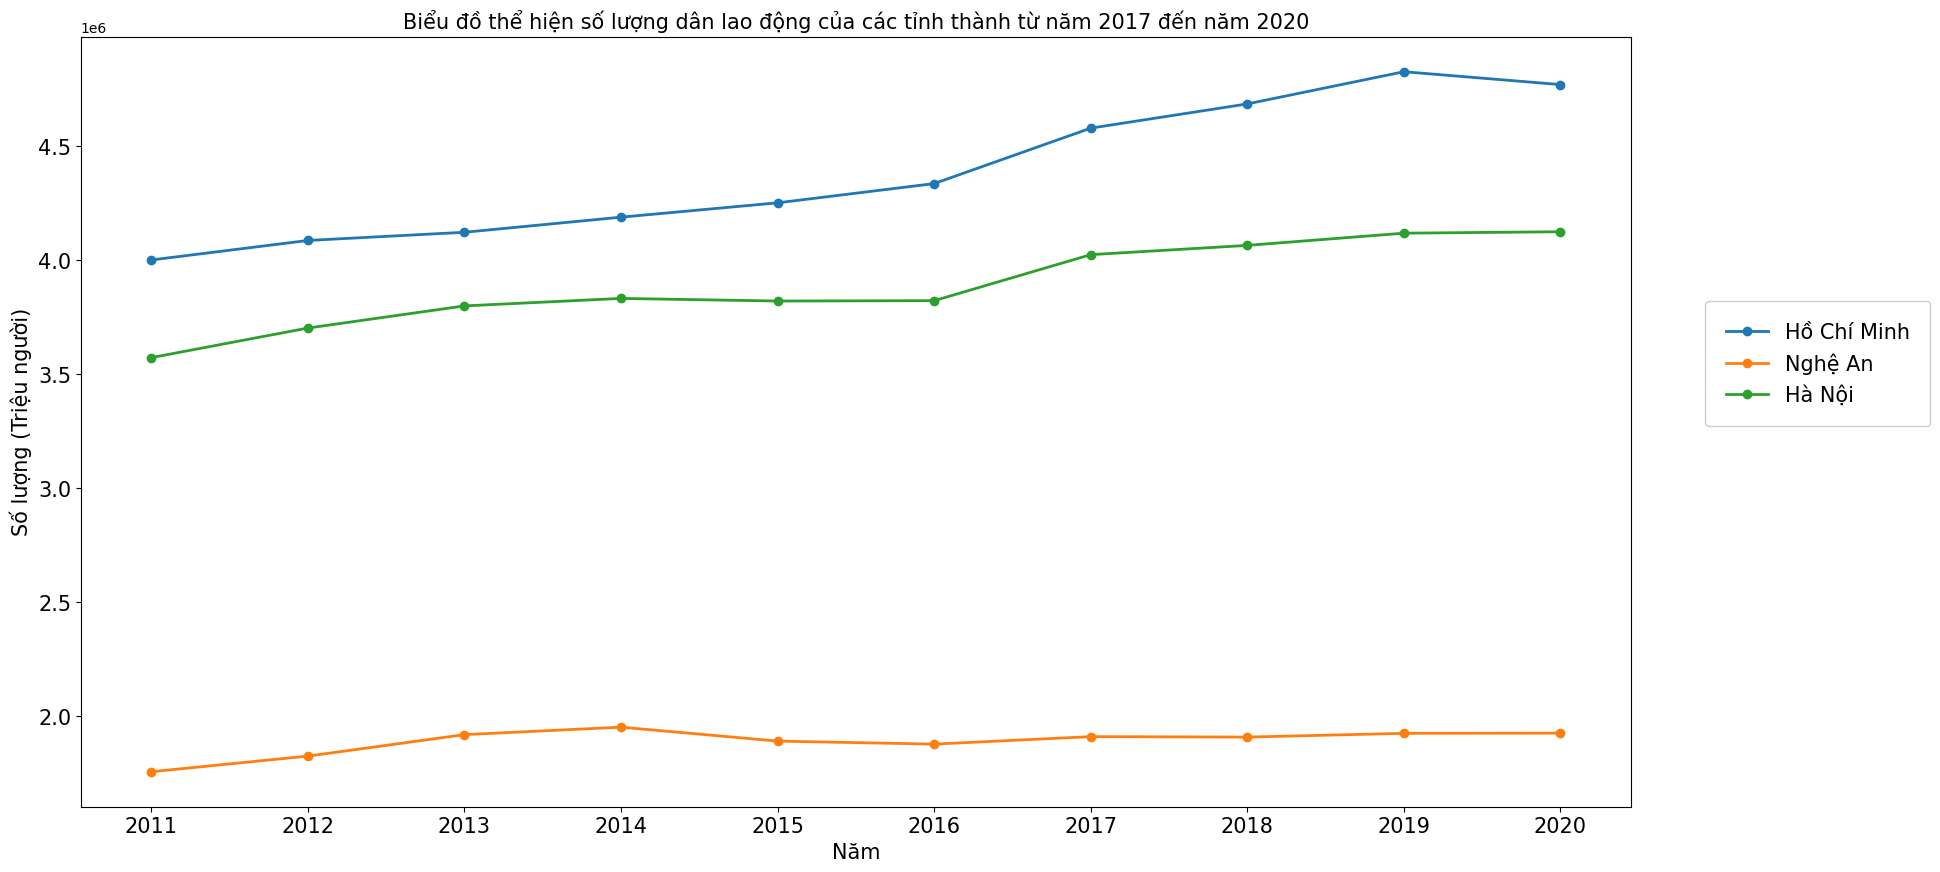

In [26]:
fig = plt.subplots(figsize =(20, 10))

plt.plot(df_tmp['Year'], df_tmp['Ho Chi Minh'],
         marker = 'o', linewidth = 2, label = 'Hồ Chí Minh')

plt.plot(df_tmp['Year'], df_tmp['Nghe An'], 
         marker = 'o', linewidth = 2, label = 'Nghệ An')

plt.plot(df_tmp['Year'], df_tmp['Ha Noi'], 
         marker = 'o', linewidth = 2, label = 'Hà Nội')

plt.title('Biểu đồ thể hiện số lượng dân lao động của các tỉnh thành từ năm 2017 đến năm 2020', fontsize = 15)
plt.legend(borderpad = 1, framealpha = 1, bbox_to_anchor=(1.2,0.67), fontsize = 15)
plt.xlabel('Năm', fontsize = 15)
plt.ylabel('Số lượng (Triệu người)', fontsize = 15)
plt.xticks(df_tmp['Year'], fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

### **Nhận xét**:
- Số lượng lực lượng lao động trên 15 tuổi có xu hướng tăng dần ở TP Hồ Chí Minh. Từ năm 2016, số lượng tăng vọt lên và đỉnh điểm là năm 2019, nhưng đến năm 2020, số lượng lại giảm xuống. Lí giải cho điều này: 
    - Thành phố Hồ Chí Minh là đô thị đặc biệt; trung tâm lớn về kinh tế, văn hóa, giáo dục - đào tạo, khoa học - công nghệ; đầu mối giao lưu và hội nhập quốc tế; đầu tàu, động lực, có sức hút và sức lan tỏa lớn của Vùng. Kinh tế thành phố tăng trưởng khá và ổn định qua các năm, GRDP tăng bình quân đạt 8,3%/năm, quy mô GRDP của Thành phố năm 2020 ước chiếm 22,8% GDP cả nước và khoảng 48,4% GRDP của Vùng. Do đó nhận thức được điều này, rất nhiều người đã đổ về thành phố Hồ Chí Minh để đi tìm việc làm, cơ hội phát triển, nâng cao đời sống.
    - Theo tìm hiểu, nhu cầu tuyển dụng 06 tháng đầu năm 2016 tại thành phố tăng 2,53% so với cùng kỳ năm 2015. Có sự gia tăng về nhu cầu tuyển dụng lao động đã qua đào tạo, kinh nghiệm, trình độ và tính chuyên nghiệp luôn là sự quan tâm của doanh nghiệp khi tuyển dụng nhân sự. Nhu cầu tuyển dụng của doanh nghiệp trong 06 tháng cuối năm 2016 tăng 13,15% so với 06 tháng đầu năm 2016. Điều này tác động tích cực đến thị trường lao động và một phần lí giải được vì sao lực lượng lao động lại tăng vọt từ năm 2016.
 
 - Tính đến tháng 12 năm 2020, cả nước có 32,1 triệu người từ 15 tuổi trở lên bị ảnh hưởng tiêu cực bởi dịch Covid-19 bao gồm người bị mất việc làm, phải nghỉ giãn việc/nghỉ luân phiên, giảm giờ làm, giảm thu nhập,… Điều đó làm cho lực lượng lao động ở thành phố Hồ Chí Minh sụt giảm đáng kể.



- Tương tư như ở TP Hồ Chí Minh, ở Hà Nội, từ năm 2016, số lượng dân lao động trên 15 tuổi cũng tăng lên, nhưng tăng đều (trên 3.500.000 triệu người). Nhưng ở Hà Nội khác Hồ Chí Minh ở chỗ tổng lực lượng lao động trên 15 không giảm dần từ năm 2019 mà vẫn giữ vững là do từ năm 2019 đến năm 2020, mặc dù vẫn tồn tại các ca nhiễm covid nhưng Hà Nội không phải là tâm dịch như Hồ Chí Minh nên mọi hoạt động, việc làm vẫn ổn định, không xảy ra tình trạng trì trệ.



- Riêng ở tỉnh Nghệ An, số lượng dân lao động không có xu hướng tăng từ năm 2016 trở lên như ở 2 thành phố trên. Số lượng cao nhất rơi vào năm 2014 và có xu hướng giảm nhẹ đến năm 2016.

- TP Hồ Chí Minh có nguồn lực lượng lao động trên 15 tuổi hùng hậu và phát triển nhất, kế đến là thủ đô Hà Nội và sau cùng là tỉnh Nghệ An.